In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Loading & Inspection

In [35]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [38]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='target'>

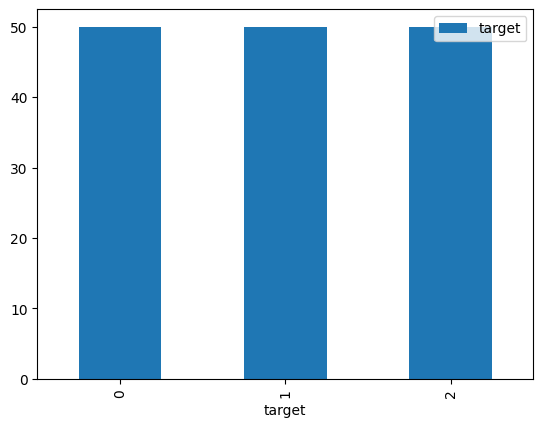

In [39]:
iris_df.groupby('target').agg({'target': 'count'}).plot.bar()

## Model Development

In [40]:
iris_df.iloc[:, :-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
iris_df.iloc[:, -1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], 
                                                    test_size=0.20, stratify=iris_df.iloc[:, -1], random_state=42)

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [51]:
y_train.value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: target, dtype: float64

In [52]:
y_test.value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: target, dtype: float64

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# CalibratedClassifierCV for getting the probability distribution of predictions
calibrated_clf = CalibratedClassifierCV(model, method='sigmoid')
calibrated_clf.fit(X_train, y_train)

predict_probabilities = calibrated_clf.predict_proba(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("test accuracy: ", test_accuracy)

model_filename = "models/iris_clf.joblib"
calibrated_clf_filename = "models/iris_calibrated_clf.joblib"
joblib.dump(model, model_filename)
joblib.dump(calibrated_clf, calibrated_clf_filename)

print("Predicted Class Label: ", y_pred[15])
print("Prediction Probabilities: ", predict_probabilities[15])

test accuracy:  0.9333333333333333
Predicted Class Label:  0
Prediction Probabilities:  [0.82637568 0.07919426 0.09443005]


In [54]:
X_test.iloc[15, :]

sepal length (cm)    5.0
sepal width (cm)     3.3
petal length (cm)    1.4
petal width (cm)     0.2
Name: 49, dtype: float64